DAKSHA SUBBAIAN
212223230036


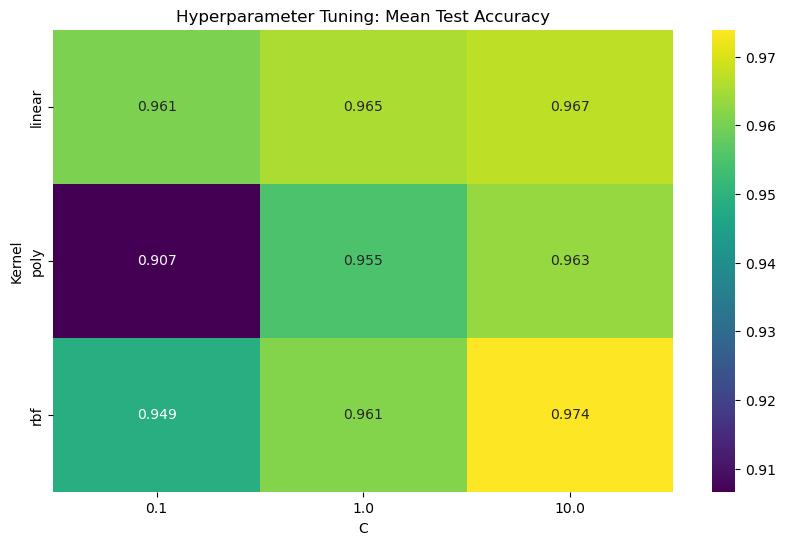

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.9770942408376964
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1337
           1       0.89      0.93      0.91       191

    accuracy                           0.98      1528
   macro avg       0.94      0.96      0.95      1528
weighted avg       0.98      0.98      0.98      1528

DAKSHA SUBBAIAN
212223230036


In [2]:
print('DAKSHA SUBBAIAN')
print('212223230036')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('food_items_binary.csv')  # Replace with your dataset file

# Separate features and target
X = data.drop(columns=['class'])  # Replace 'class' with your target column name
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the results for a heatmap
heatmap_data = results.pivot_table(index='param_kernel', columns='param_C', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f")
plt.title('Hyperparameter Tuning: Mean Test Accuracy')
plt.xlabel('C')
plt.ylabel('Kernel')
plt.show()

# Evaluate the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)
print('DAKSHA SUBBAIAN')
print('212223230036')